# Sales Analysis using Python Pandas

#### 1)impart pandas
#### 2)Task 1: read all sales data files (all .csv files)
#### 3)clean - drop NaN
#### 4)Task 2:add "Month" column and remove "Or" from it
#### 5)Task 3: add "Sales" column convert data types
#### 6)Task 4: add "City" column
#### 6.1)Q1 : group by to know which months sales are high ---> December
#### 7)Import matplotlib
#### 8)Q2 : What city had the highest number of sales? ---> San Francisco CA
#### 9)Q3: What time shoud we display advertisements to maximize likelihood of customer's buying product? ---> after 11:00 am to 1:00 pm, 6:00pm to 8:00 pm // ( 11 am or 7 pm)

#### 10)Q4: What products are most often sold togehter? ----> iPhone', ' Lightning Charging Cable') 1005

#### 11)Q5: What products sold the most? why do you think it sold the most? ---> AAA Batteries because price is low






In [347]:
import pandas as pd
import os

#### Task 1: Merge 12 months of sales data into a single .CSV file
     (##shift + Enter - for new cell)

In [348]:
#df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files=[file for file in os.listdir('./Sales_Data')]

#Define the next table as Pandas Dataframe
all_months_data=pd.DataFrame()

for file in files:
    df= pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data, df]) #merge file one by one
    
#convert data frame to .csv file
all_months_data.to_csv("all_data.csv", index=False)

#### Read .CSV with all months data

In [349]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

In [350]:
print(all_data[["Order Date"]].isna().sum())

Order Date    545
dtype: int64


### drop all NaN

In [351]:
all_data=all_data.dropna(subset=["Order Date"])

In [352]:
print(all_data[["Order Date"]].isna().sum())

Order Date    0
dtype: int64


## Augment data with additional columns

#### Task 2: Add month column

In [353]:
all_data["Month"] = all_data["Order Date"].str[0:2]        #first two digit for month from date

In [354]:
print(all_data["Month"].unique())                #for unique values

['12' 'Or' '01' '04' '05' '02' '03' '08' '09' '06' '11' '10' '07']


#### Remove "Or" from Month

In [355]:
all_data = all_data[all_data["Order Date"].str[0:2]!= 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [356]:
print(all_data["Month"].unique())  #after removing "Or"

['12' '01' '04' '05' '02' '03' '08' '09' '06' '11' '10' '07']


In [357]:
all_data["Month"] = all_data["Month"].astype("int32")               #Convert datatype into int32
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [358]:
all_data["Quantity Ordered"]= pd.to_numeric(all_data["Quantity Ordered"])        #make int
all_data["Price Each"]= pd.to_numeric(all_data["Price Each"])                      #make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Task 3: Add a sales column

In [359]:
all_data["Sales"]=all_data["Quantity Ordered"]* all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [360]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


## Task 4: Add a city column

In [361]:
#let's use .apply()

def get_state(address):
      return address.split(",")[2].split(" ")[1]

def get_city(address):
     return address.split(",")[1]

all_data["City"]= all_data["Purchase Address"].apply(lambda x: get_city(x) + " " + get_state(x))


#all_data["City"]= all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")     # can use f string here
#or 

# all_data["City"]= all_data["Purchase Address"].apply(lambda x: x.split(",")[1])  #extract city from address
all_data.head()

#all_data=all_data.drop(columns="Column")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


## Question 1: What was the best month for sales? How much earned that month?

In [362]:
results=all_data.groupby("Month").sum()
results.head(12)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73,Dallas TX New York City NY New York City NY S...
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42,Portland ME San Francisco CA New York City NY...
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco CA Portland OR San Francisco CA...
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas TX Boston MA Los Angeles CA Los Angele...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland OR San Francisco CA Boston MA Boston...
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",2577802.26,San Francisco CA Dallas TX San Francisco CA S...
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76,Atlanta GA Seattle WA Atlanta GA Atlanta GA S...
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle WA Dallas TX Portland OR Los Angeles ...
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13,San Francisco CA San Francisco CA Seattle WA ...


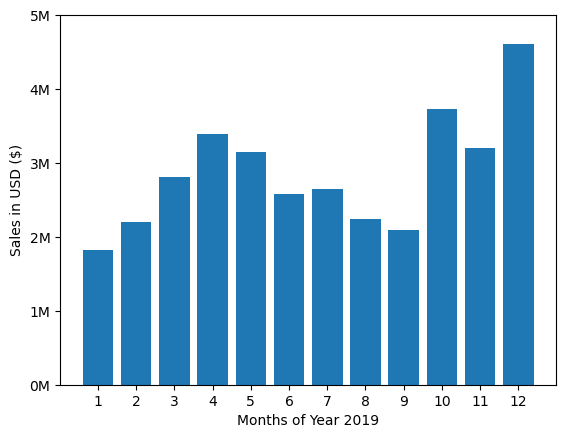

In [363]:
import matplotlib.pyplot as plt

months= range(1,13)

plt.bar(months, results["Sales"])

plt.xticks(months)
plt.yticks([0,1000000,2000000,3000000,4000000,5000000],["0M","1M","2M","3M","4M","5M"])
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months of Year 2019")


plt.show()

### Question 2: What city had the highest number of sales?

In [365]:
results=all_data.groupby("City").sum()
results.head(12)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta GA,2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602,2779908.20,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,2795498.58
Austin TX,2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153,1809873.61,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,1819581.75
Boston MA,2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,3637409.77,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,3661642.01
Dallas TX,2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730,2752627.82,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,2767975.40
Los Angeles CA,2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,5421435.23,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,5452570.80
New York City NY,2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,4635370.83,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,"136 Church St, New York City, NY 10001562 2nd ...",175741,4664317.43
Portland ME,2956862957972958622960182961272961582962062962...,USB-C Charging CableWired HeadphonesAAA Batter...,2750,447189.25,12/17/19 16:1012/16/19 09:2312/03/19 14:2212/2...,"573 Maple St, Portland, ME 04101163 Washington...",17144,449758.27
Portland OR,2956712956822957342957572958192958572958922958...,USB-C Charging CableUSB-C Charging CableAAA Ba...,11303,1860558.22,12/16/19 15:1012/23/19 19:2512/25/19 12:3812/0...,"928 12th St, Portland, OR 97035780 Elm St, Por...",70621,1870732.34
San Francisco CA,2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,50239,8211461.74,12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,8262203.91


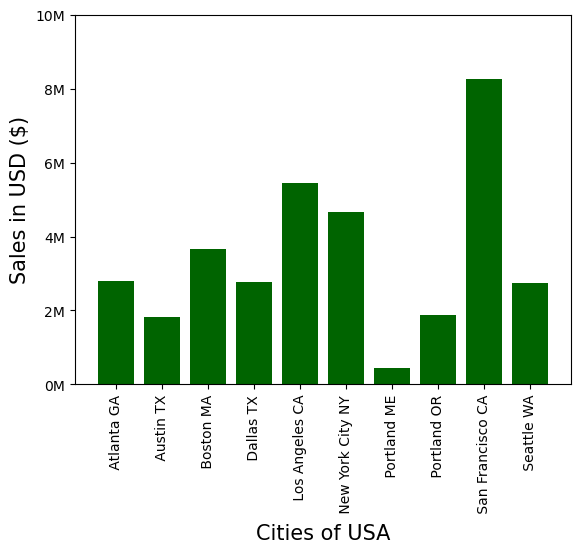

In [335]:
import matplotlib.pyplot as plt

#cities= all_data["City"].unique()
#for city, df in ...: This part iterates over each group created by the groupby operation. In each iteration, city represents the name of the city (the group key), and df represents the DataFrame containing the rows associated with that city.
cities= [city for city,df in all_data.groupby('City')]

plt.bar(cities, results["Sales"],color="darkgreen")

plt.xticks(cities,rotation=90)
plt.yticks([0,2000000,4000000,6000000,8000000,10000000,],["0M","2M","4M","6M","8M","10M"])
plt.ylabel("Sales in USD ($)",size =15)
plt.xlabel("Cities of USA", size=15)


plt.show()

# Question 3: What time shoud we display advertisements to maximize likelihood of customer's buying product?

In [336]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

/var/folders/hm/2cwf19gx3_93qlqb1v7k_lqw0000gn/T/ipykernel_12525/282589525.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [337]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


In [338]:
hours=[hours for hours, df in all_data.groupby("Hour")]

all_data.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


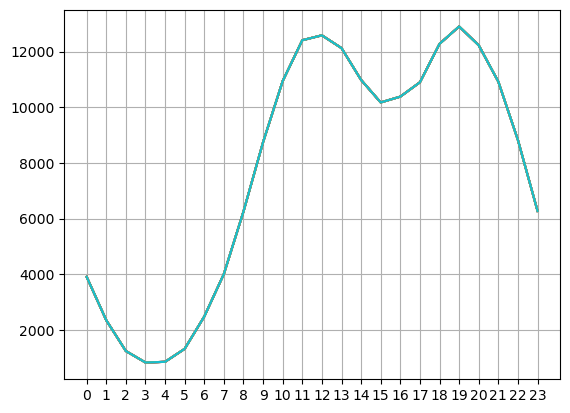

In [339]:
plt.plot(hours, all_data.groupby(["Hour"]).count())

plt.xticks(hours)
plt.grid()
plt.show()


# Question 4: What products are most often sold togehter?

In [341]:
df=all_data[all_data["Order ID"].duplicated(keep=False)] #duplicate together

df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

df=df[["Order ID","Grouped"]].drop_duplicates()


df.head(20)

/var/folders/hm/2cwf19gx3_93qlqb1v7k_lqw0000gn/T/ipykernel_12525/3929441734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
80,295737,"iPhone, Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor, Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones, Wired Headphones"
129,295783,"Vareebadd Phone, USB-C Charging Cable"
133,295786,"USB-C Charging Cable, Apple Airpods Headphones"


In [342]:
from itertools import combinations
from collections import Counter

count= Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))  # 2 for two items combinatin 
    
#print(count)

#count.most_common(10)

for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


In [368]:

product_group=all_data.groupby("Product")

#product_group.sum()

# Question 5: What products sold the most? why do you think it sold the most?

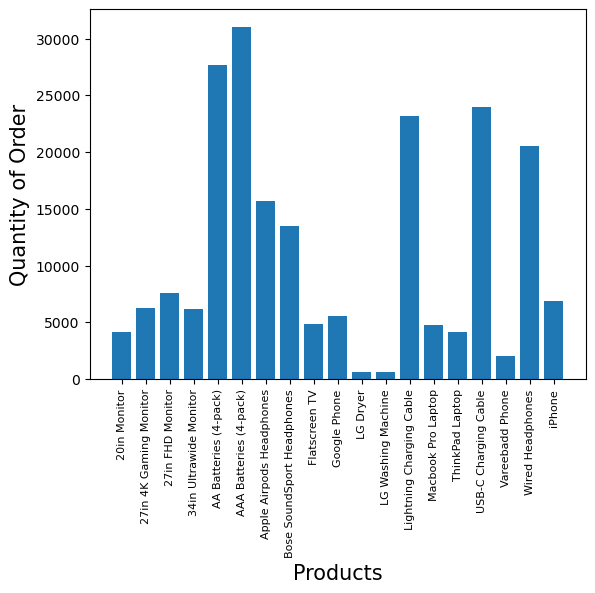

In [377]:
quantity_ordered= product_group.sum()["Quantity Ordered"]

products= [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products,rotation = 90, size= 8)

plt.ylabel("Quantity of Order",size =15)
plt.xlabel("Products", size=15)

plt.show()

In [384]:
prices= all_data.groupby("Product")["Price Each"].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/hm/2cwf19gx3_93qlqb1v7k_lqw0000gn/T/ipykernel_12525/2140378929.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size= 10)


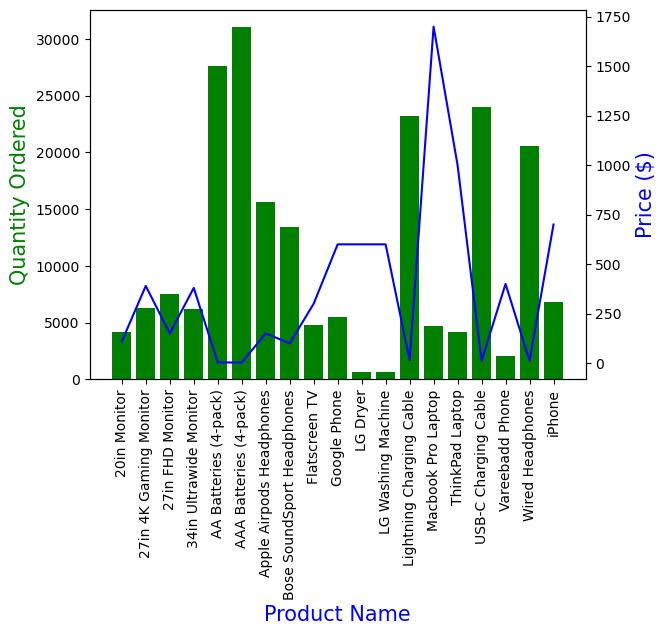

In [409]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color="g")
ax2.plot(products,prices, "b-")

ax1.set_xlabel("Product Name", color="b", size=15)
ax1.set_ylabel("Quantity Ordered", color="g", size=15)

ax2.set_ylabel("Price ($)", color="b", size =15)

ax1.set_xticklabels(products, rotation="vertical", size= 10)

plt.show()